<a href="https://colab.research.google.com/github/VIVEK818713/machine-learning-algorithm/blob/main/2_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##A multiple linear regression model is able to analyze the relationship between several independent variables and a single dependent variable
##With multiple linear regression, however, we could have any number of parameters. Let’s take a look at multiple linear regression’s equation to visualize this.
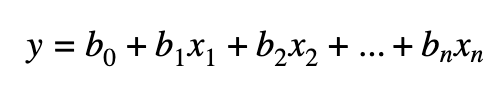

##Let’s break this down into its various components:

##y represents the dependent variable

##b_0 represents the dependent variable axis intercept (this is a parameter that our model will optimize)

##n signifies the number of variables in our dataset

##x_1 through x_n are the independent variables in our dataset

##The variables b_1 through b_n are coefficient parameters that our model will also tune

##As we can see, this isn’t just a simple equation of a line. It’s actually an equation of a hyperplane.

##So what exactly is a hyperplane?

##A hyperplane is essentially a line of best fit for data in 3 or more dimensions. If we have two independent variables and one dependent variable, the hyperplane would look like this:
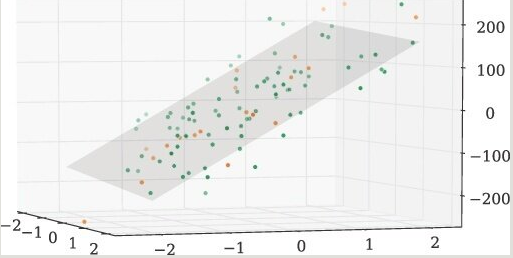

##In this sample representation, the two horizontal axes represent the independent variables while the vertical axis represents the dependent variable. 

##So, the regressor tries to create an equation of a hyperplane that best represents the training data it is given. 

##This means that the regressor will have to try out several different equations to see which hyperplane best fits the data. 

##But how does it determine how “well” a hyperplane represents the training set?

#The Cost Function
##It does this by calculating a metric known as cost, which is the degree of error between the hyperplane’s values and those of the training dataset. The cost can be calculated by many different formulas, but the one that linear regression uses is known as the multivariate Mean Squared Error (MSE) Cost Function. By determining how well a hyperplane represents the data, the regression model can tune the values of the parameters (i.e b_0, b_1, etc.) and optimize accuracy. 

##Okay, so now that the model has the error for its hyperplane, it can tune  all the parameter values to reduce the cost. 

##But how does it do this?

##This where a process called gradient descent comes into play.

#Gradient Descent
##Gradient descent is a complex algorithm, but it is necessary to learn how it works. Because of its complexity.
##After completing gradient descent, our algorithm will have finalized all the parameter values and created the equation of the optimal hyperplane. This equation can then be used to predict future values.

#Predicting
##Let’s say that our model was trained on a dataset with two independent variables. This would mean that our hyperplane equation would be in this form:

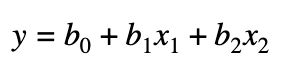

##After gradient descent, our model would have converged on three values for b_0, b_1, and b_2. Let’s say that:

##b_0 converged to 11

##b_1 converged to -6

##b_2 converged to 9

##This means that our finalized hyperplane equation looks like this:

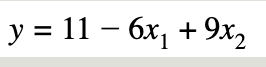

##But how can this be used to predict future values? As you’ve probably already guessed, all we need to do is plug in the values of the independent variables into x_1 and x_2. Let’s assume some more values just to work through this process:

##x_1 is equal to 350

##x_2 is equal to 46

##Now we simply plug our numbers into the finalized hyperplane equation and the resulting value will be the estimated value of our model! Let’s look at what this simplifies to:

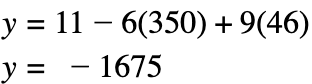

##So our model has returned an estimated value of -1675 for the dependent variable! 

##Recap
##Let’s quickly recap how a multiple linear regression model works:

##The Mean Squared Cost Function is used to reduce the error of the hyperplane

##The parameters (b_0 - b_n) are tuned using gradient descent

##Independent variables are plugged into the finalized equation to estimate a value for y

##Now for the really exciting part—coding our very own regressor in Python!

# multiple regression implementation

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0machine learning/csv data/startup linear regression.csv')
df.head()

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

In [ ]:

plt.scatter(df['R&D Spend'],df['Profit'])
plt.xlabel('R&d')
plt.ylabel('Profit')

In [ ]:
plt.scatter(df['Administration'],df['Profit'])
plt.xlabel('Administration')
plt.ylabel('Profit')

In [ ]:
plt.scatter(df['Marketing Spend'],df['Profit'])
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')

In [ ]:
# here state is categorical type so we have convert it into numerical type
# for this we will use pandas get.dummy() 
df=pd.get_dummies(df,columns=['State'],drop_first=True)
df.head()

In [ ]:
# now split the data (dependent and indepandent variable)
X=df.drop('Profit',axis=True)
y=df['Profit']

In [ ]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

In [ ]:
y_prediction =  LR.predict(x_test)
y_prediction

In [ ]:
LR.score(x_train,y_train)

In [ ]:
LR.score(x_test,y_test)

In [ ]:
LR.coef_

In [ ]:
LR.intercept_

In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score

score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

# Multiple Regression 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0machine learning/csv data/houses_to_rent.csv')
df.head()

here we can see an 'unnamed: 0' column is there so 
* we can remove it or rename it , depends upon you
* so will do both for understanding
* first we will rename it 
* after that we will understand if we dont know that column then drop it from the dataframe

In [ ]:
df.columns

In [ ]:
df=df.rename(columns={'Unnamed: 0':'ID'})
df.columns

* if you not understand that column and you feel that it is not required any more then you can remove it

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0machine learning/csv data/houses_to_rent.csv')
df.columns

In [ ]:
df=df.drop('Unnamed: 0',axis=1)
df.columns

* Or you can create new data frame by using columns
* lets try this one also

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0machine learning/csv data/houses_to_rent.csv')
df.head()

* so there are many columns which may be not considered in our consideration
* so lets remove it
* we can use 2 ways to do this lets try one by one

In [ ]:
df=df[['city','rooms','bathroom','parking spaces',
      'furniture','rent amount','fire insurance']]
df.columns


* second way is to drop unwanted columns from dataframe

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0machine learning/csv data/houses_to_rent.csv')
df.head(1)

In [ ]:
df=df.drop(columns=['Unnamed: 0','area','floor','animal','hoa','property tax','total'],axis=1)
df.columns

In [ ]:
# now observe the data in rent amount , property tax 
# we dont want R$ before values beacuse it is price like value
# so our next task is to preprocess this data and correct it for further work

df.dtypes

In [ ]:
df.head(3)

In [ ]:
df=df.replace('([R$,])','',regex=True)

In [ ]:
df.head()

In [ ]:
# here is a problem in linear regression all data should not be in object type
# so we should convert it
# Let's try 
df.dtypes

In [ ]:
df['rent amount']=df['rent amount'].astype(int)
df['fire insurance']=df['fire insurance'].astype(int)

In [ ]:
df.dtypes


* now if you observed that 'furniture' column has categorical data
* but we need numerical data for linear regression
* so we can use onehotencoding or label encoding
* here we will use onehotencoding

In [ ]:
df.head()

In [ ]:
df=pd.get_dummies(df,columns=['furniture'],drop_first=True)
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
X=df.drop(columns=['rent amount'],axis=1)
y=df['rent amount']

In [ ]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

In [ ]:
LR.intercept_

In [ ]:
LR.coef_

In [ ]:
# for accuracy
accuracy=LR.score(X_test,y_test)
accuracy

In [ ]:
y_test

In [ ]:
# Evaluation
y_pridict=LR.predict(X_test)
y_pridict

In [ ]:
# now we will check the deviation from actual value and the predicted value
comp=pd.DataFrame({'Actual':y_test,'Predicted':y_pridict})
comp


In [ ]:
print(X_test.shape)
print(y_test.shape)
print(y_pridict.shape)

In [ ]:
X_test.head(1)

In [ ]:
# Evaluation
LR.predict([[2,3,2,2,12,1]])

### Model Evaluation 

 **Mean Squre Error & Root Mean Squre Error**
 * If RMSE is giving 0 or 0.1 etc then it is **Overfit**
 * If RMSE is giving 200,100 etc then it is **Underfit**
 


* If it is so then you should go for other Model 
* Like Decision tree, SVM etc. and check the RSME

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse=mean_squared_error(y_test,y_pridict)
rmse=np.sqrt(mse)
print("Mean squre error",mse)
print("root Mean squre error",rmse)

### RMSE is very high so this linear model is not good
* Either you should do good data preprocessing
* Or go for other Models(decion Tree, SVM ,etc)

## R-Squre
* R-Squre is a statistical measure of how close the  data are to the fitted regression line.
* it is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression
###Now check R squre value
* if the R-squre value is 1 or close to 1 then it is best score
* if the R -squre value is 0 or negative then it is worse

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2=r2_score(y_test,y_pridict)
print("R-Squre is",r2)

### it is close to 1 so it is best model 

# now understand multiple regression fro the scratch and understand the equation and its parameter calculation

In [ ]:
import numpy as np
from sklearn.datasets import load_diabetes

In [ ]:
X,y = load_diabetes(return_X_y=True)

In [ ]:
X

In [ ]:
y

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train,y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

#Making our own Linear Regression Class for the same calculation as above

In [ ]:
class MLR:
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        
        # calcuate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
    
    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred
        

In [ ]:
lr = MLR()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
X_train.shape

## now insert a column for value 1 in  X_train

In [ ]:
np.insert(X_train,0,1,axis=1).shape

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
lr.coef_

In [ ]:
lr.intercept_